In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
from google.colab import files
uploaded = files.upload()


Saving Heart.csv to Heart.csv


In [4]:
# Load the dataset
dataset = pd.read_csv('Heart.csv')

# Display the first few rows of the dataset
dataset.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
dataset.shape

(4238, 16)

In [6]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
dataset = dataset.dropna(how='any',axis=0)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [10]:
# Define the column names and their descriptions
columns_info = {
    "male": "1: male, 0: female",
    "age": "Age of the individual",
    "education": "Education level",
    "currentSmoker": "0: non-smoker, 1: current smoker",
    "cigsPerDay": "Number of cigarettes per day",
    "BPMeds": "Use of blood pressure medications",
    "prevalentStroke": "1: individual had a stroke, 0: no stroke",
    "prevalentHyp": "1: individual has prevalent hypertension, 0: no hypertension",
    "diabetes": "1: individual has diabetes, 0: no diabetes",
    "totChol": "Serum cholesterol in mg/dL",
    "sysBP": "Systolic blood pressure",
    "diaBP": "Diastolic blood pressure",
    "BMI": "Body Mass Index (BMI)",
    "heartRate": "Heart rate",
    "glucose": "Glucose level",
    "TenYearCHD": "1: 10-year risk of coronary heart disease, 0: no risk"
}

for column, description in columns_info.items():
    print(f"{column} - {description}")


male - 1: male, 0: female
age - Age of the individual
education - Education level
currentSmoker - 0: non-smoker, 1: current smoker
cigsPerDay - Number of cigarettes per day
BPMeds - Use of blood pressure medications
prevalentStroke - 1: individual had a stroke, 0: no stroke
prevalentHyp - 1: individual has prevalent hypertension, 0: no hypertension
diabetes - 1: individual has diabetes, 0: no diabetes
totChol - Serum cholesterol in mg/dL
sysBP - Systolic blood pressure
diaBP - Diastolic blood pressure
BMI - Body Mass Index (BMI)
heartRate - Heart rate
glucose - Glucose level
TenYearCHD - 1: 10-year risk of coronary heart disease, 0: no risk


In [11]:
dataset["TenYearCHD"].describe()

count    3656.000000
mean        0.152352
std         0.359411
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64

In [12]:
dataset["TenYearCHD"].unique()

array([0, 1])

In [13]:
print(dataset.corr()["TenYearCHD"].abs().sort_values(ascending=False))

TenYearCHD         1.000000
age                0.233810
sysBP              0.222885
prevalentHyp       0.181556
diaBP              0.150342
glucose            0.121942
diabetes           0.093397
male               0.091745
totChol            0.091127
BPMeds             0.089116
BMI                0.081931
education          0.063068
cigsPerDay         0.052159
prevalentStroke    0.048351
heartRate          0.020523
currentSmoker      0.019176
Name: TenYearCHD, dtype: float64


In [14]:
dataset["TenYearCHD"].unique()

array([0, 1])

0    3099
1     557
Name: TenYearCHD, dtype: int64


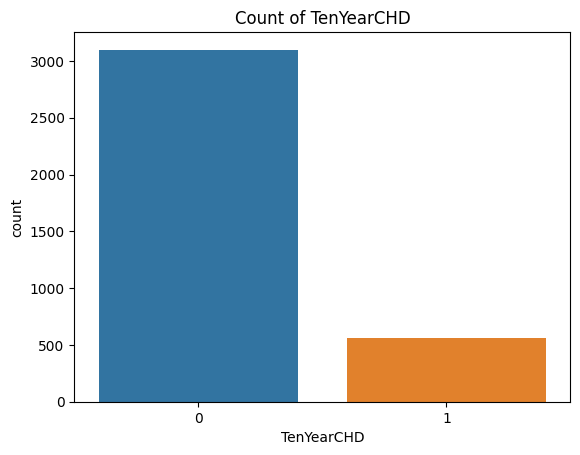

In [15]:
# Plot a count plot for the "TenYearCHD" column
sns.countplot(x='TenYearCHD', data=dataset)
plt.title("Count of TenYearCHD")

# Display the value counts for the "TenYearCHD" column
TenYearCHD_count = dataset['TenYearCHD'].value_counts()

# Print the value counts
print(TenYearCHD_count)

# Show the plot
plt.show()

In [16]:
print("Percentage of patient without Ten Year Coronary Heart Disease: "+str(round(TenYearCHD_count[0]*100/4238,2)))
print("Percentage of patient with Ten Year Coronary Heart Disease: "+str(round(TenYearCHD_count[1]*100/4238,2)))

Percentage of patient without Ten Year Coronary Heart Disease: 73.12
Percentage of patient with Ten Year Coronary Heart Disease: 13.14


In [17]:
dataset["male"].unique()

array([1, 0])

<Axes: xlabel='male', ylabel='TenYearCHD'>

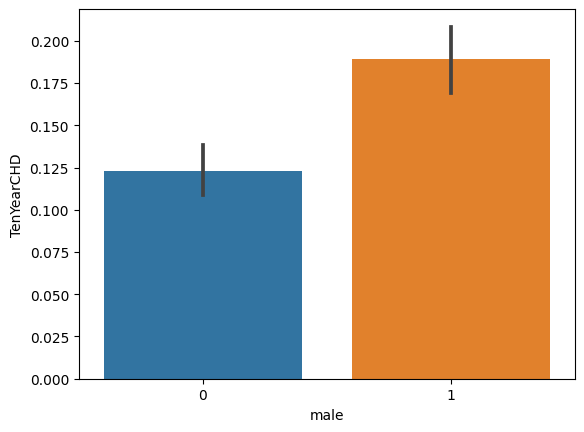

In [18]:
sns.barplot(x = 'male', y ='TenYearCHD' , data = dataset)

In [19]:
dataset["currentSmoker"].unique()

array([0, 1])

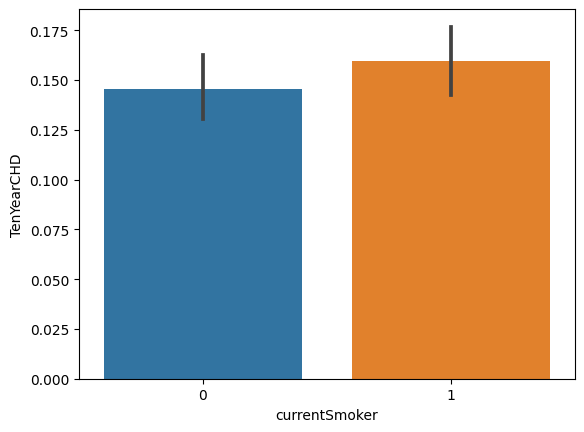

In [20]:
sns.barplot(x = 'currentSmoker',y = 'TenYearCHD', data = dataset);

In [21]:
dataset["cigsPerDay"].unique()

array([ 0., 20., 30., 23., 15., 10.,  5., 35., 43.,  1., 40.,  3.,  9.,
        2., 12.,  4., 18., 60., 25., 45.,  8., 13., 11.,  7.,  6., 38.,
       50., 29., 17., 16., 19., 70., 14.])

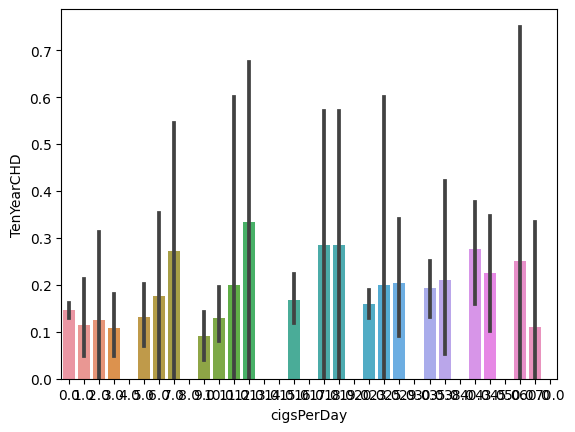

In [22]:
sns.barplot(x = 'cigsPerDay',y = 'TenYearCHD', data = dataset);

In [23]:
dataset["diabetes"].unique()

array([0, 1])

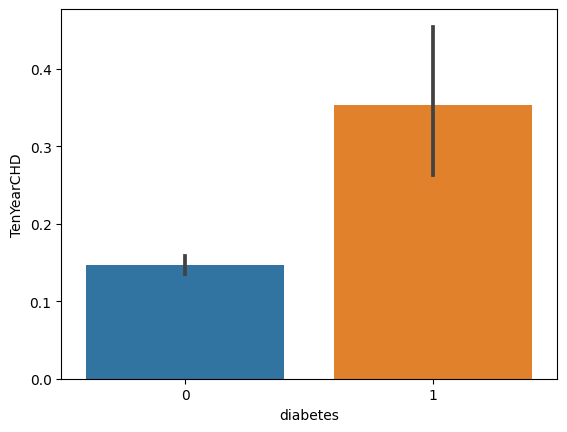

In [24]:
sns.barplot(x = 'diabetes',y = 'TenYearCHD', data = dataset);

In [25]:
dataset["totChol"].unique()

array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 221., 232., 291., 190., 234., 215., 270., 272., 295.,
       226., 209., 214., 178., 233., 180., 243., 237., 311., 208., 252.,
       261., 179., 267., 216., 240., 266., 255., 185., 220., 235., 212.,
       223., 300., 302., 175., 189., 258., 202., 183., 274., 170., 210.,
       197., 326., 188., 256., 244., 193., 239., 296., 269., 275., 268.,
       265., 173., 273., 290., 278., 264., 282., 257., 241., 288., 200.,
       213., 303., 246., 150., 187., 286., 154., 279., 293., 259., 219.,
       230., 320., 312., 165., 159., 174., 242., 301., 167., 308., 325.,
       229., 236., 224., 253., 464., 248., 171., 186., 227., 249., 176.,
       196., 310., 164., 135., 238., 207., 342., 287., 182., 352., 284.,
       203., 262., 155., 323., 206., 283., 319., 194., 340., 328., 222.,
       368., 218., 276., 339., 231., 198., 201., 277., 304., 177., 199.,
       292., 305., 152., 161., 168., 181., 251., 27

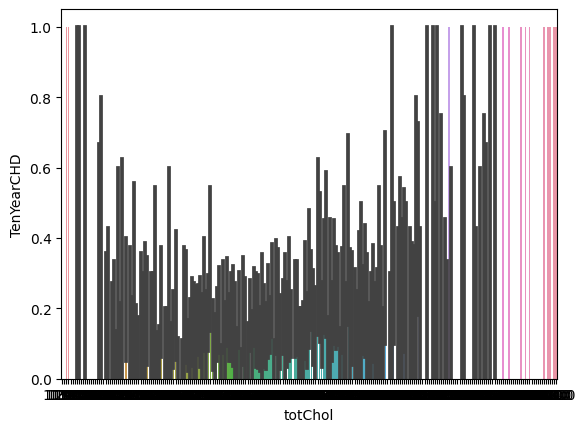

In [26]:
sns.barplot(x = 'totChol',y = 'TenYearCHD', data = dataset);

In [27]:
dataset["BMI"].unique()

array([26.97, 28.73, 25.34, ..., 26.7 , 43.67, 19.71])

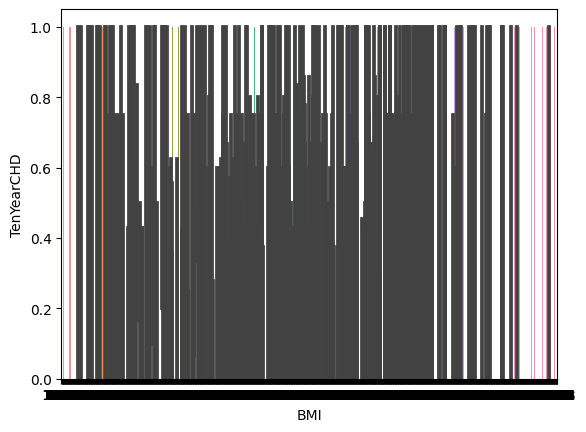

In [28]:
sns.barplot(x = 'BMI',y = 'TenYearCHD', data = dataset);

In [29]:
dataset["heartRate"].unique()

array([ 80.,  95.,  75.,  65.,  85.,  77.,  60.,  79.,  76.,  93.,  72.,
        98.,  64.,  70.,  71.,  62.,  73.,  90.,  96.,  68.,  63.,  88.,
        78.,  83., 100.,  84.,  57.,  50.,  74.,  86.,  55.,  92.,  66.,
        87., 110.,  81.,  56.,  89.,  82.,  54.,  69.,  67.,  52.,  61.,
       140., 130.,  58., 104.,  94., 105.,  91.,  53., 108., 106.,  59.,
       107.,  48., 112., 125., 103.,  44.,  47.,  45.,  97., 122., 102.,
       120.,  99., 115., 143., 101.,  46.])

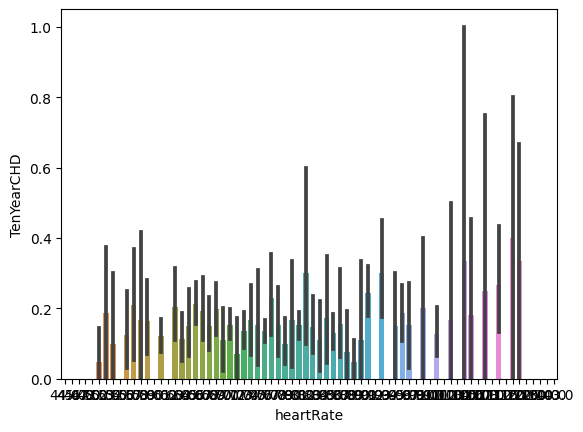

In [30]:
sns.barplot(x = 'heartRate',y = 'TenYearCHD', data = dataset);

In [31]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("TenYearCHD",axis=1)
TenYearCHD = dataset["TenYearCHD"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,TenYearCHD,test_size=0.20,random_state=0)

predictors = dataset.drop("TenYearCHD",axis=1)
TenYearCHD = dataset["TenYearCHD"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,TenYearCHD,test_size=0.20,random_state=0)

In [32]:
X_train.shape

(2924, 15)

In [33]:
X_test.shape

(732, 15)

In [34]:
Y_train.shape

(2924,)

In [35]:
Y_test.shape

(732,)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=4000)

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [38]:
Y_pred_lr.shape

(732,)

In [39]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.38 %


In [40]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [41]:
Y_pred_nb.shape

(732,)

In [42]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 82.38 %


In [44]:
#SUPPORT VECTOR MACHINE
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [45]:
Y_pred_svm.shape

(732,)

In [46]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 85.11 %


In [47]:
#K NEAREST NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [48]:
Y_pred_knn.shape

(732,)

In [49]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 83.61 %


In [50]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [51]:
print(Y_pred_dt.shape)

(732,)


In [52]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.73 %


In [53]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(4000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [54]:
Y_pred_rf.shape

(732,)

In [55]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 86.07 %


In [56]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.38 %
The accuracy score achieved using Naive Bayes is: 82.38 %
The accuracy score achieved using Support Vector Machine is: 85.11 %
The accuracy score achieved using K-Nearest Neighbors is: 83.61 %
The accuracy score achieved using Decision Tree is: 77.73 %
The accuracy score achieved using Random Forest is: 86.07 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

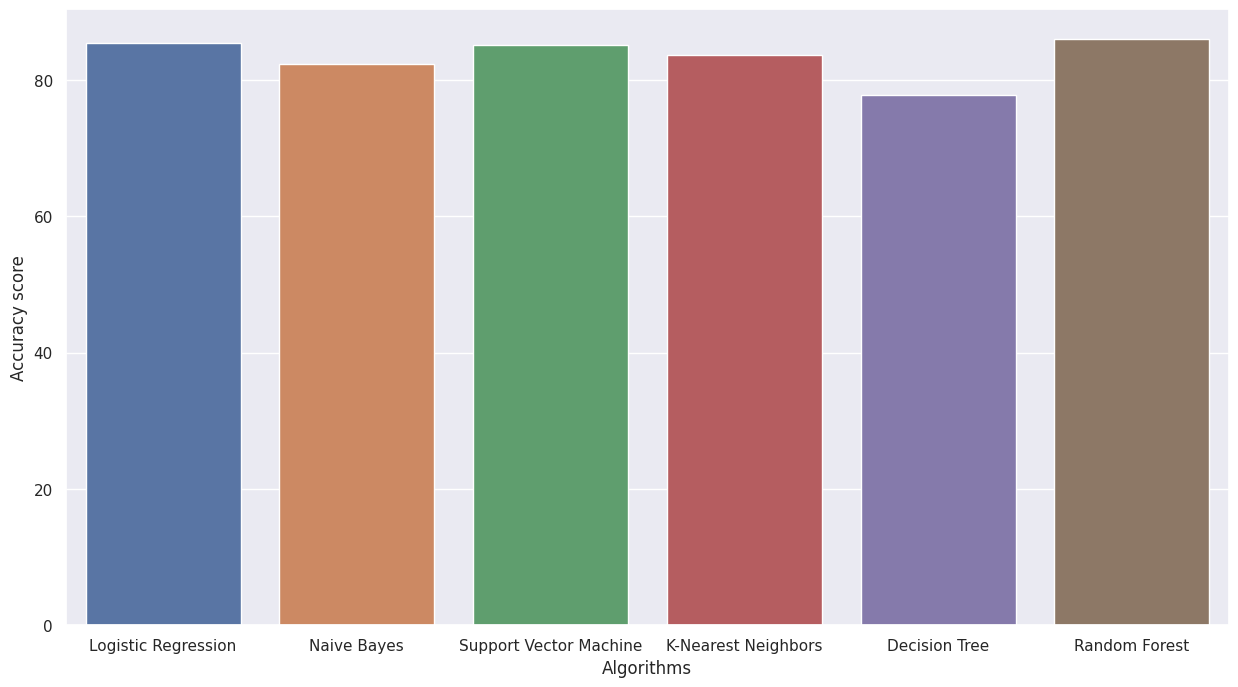

In [57]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x= algorithms, y = scores)

In [61]:
new_data = pd.DataFrame({
    'male':0,
    'age':25,
    'education':1,
    'currentSmoker':1,
    'cigsPerDay':2,
    'BPMeds':0,
    'prevalentStroke':0,
    'prevalentHyp':0,
    'diabetes':0,
    'totChol':206,
    'sysBP':144,
    'diaBP':82,
    'BMI':25,
    'heartRate':75,
    'glucose': 76,

},index=[0])

In [62]:
new_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,25,1,1,2,0,0,0,0,206,144,82,25,75,76


In [63]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease
